# Wine Quality Analysis

Instructions:  
These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('1788410-1767134-1729261-1613779-Red_wine__(1).csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### preprocessing

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
#fill the missing values
for c,val in data.items():
    data[c]=data[c].fillna(data[c].mean())

In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Exploratory data analysis 

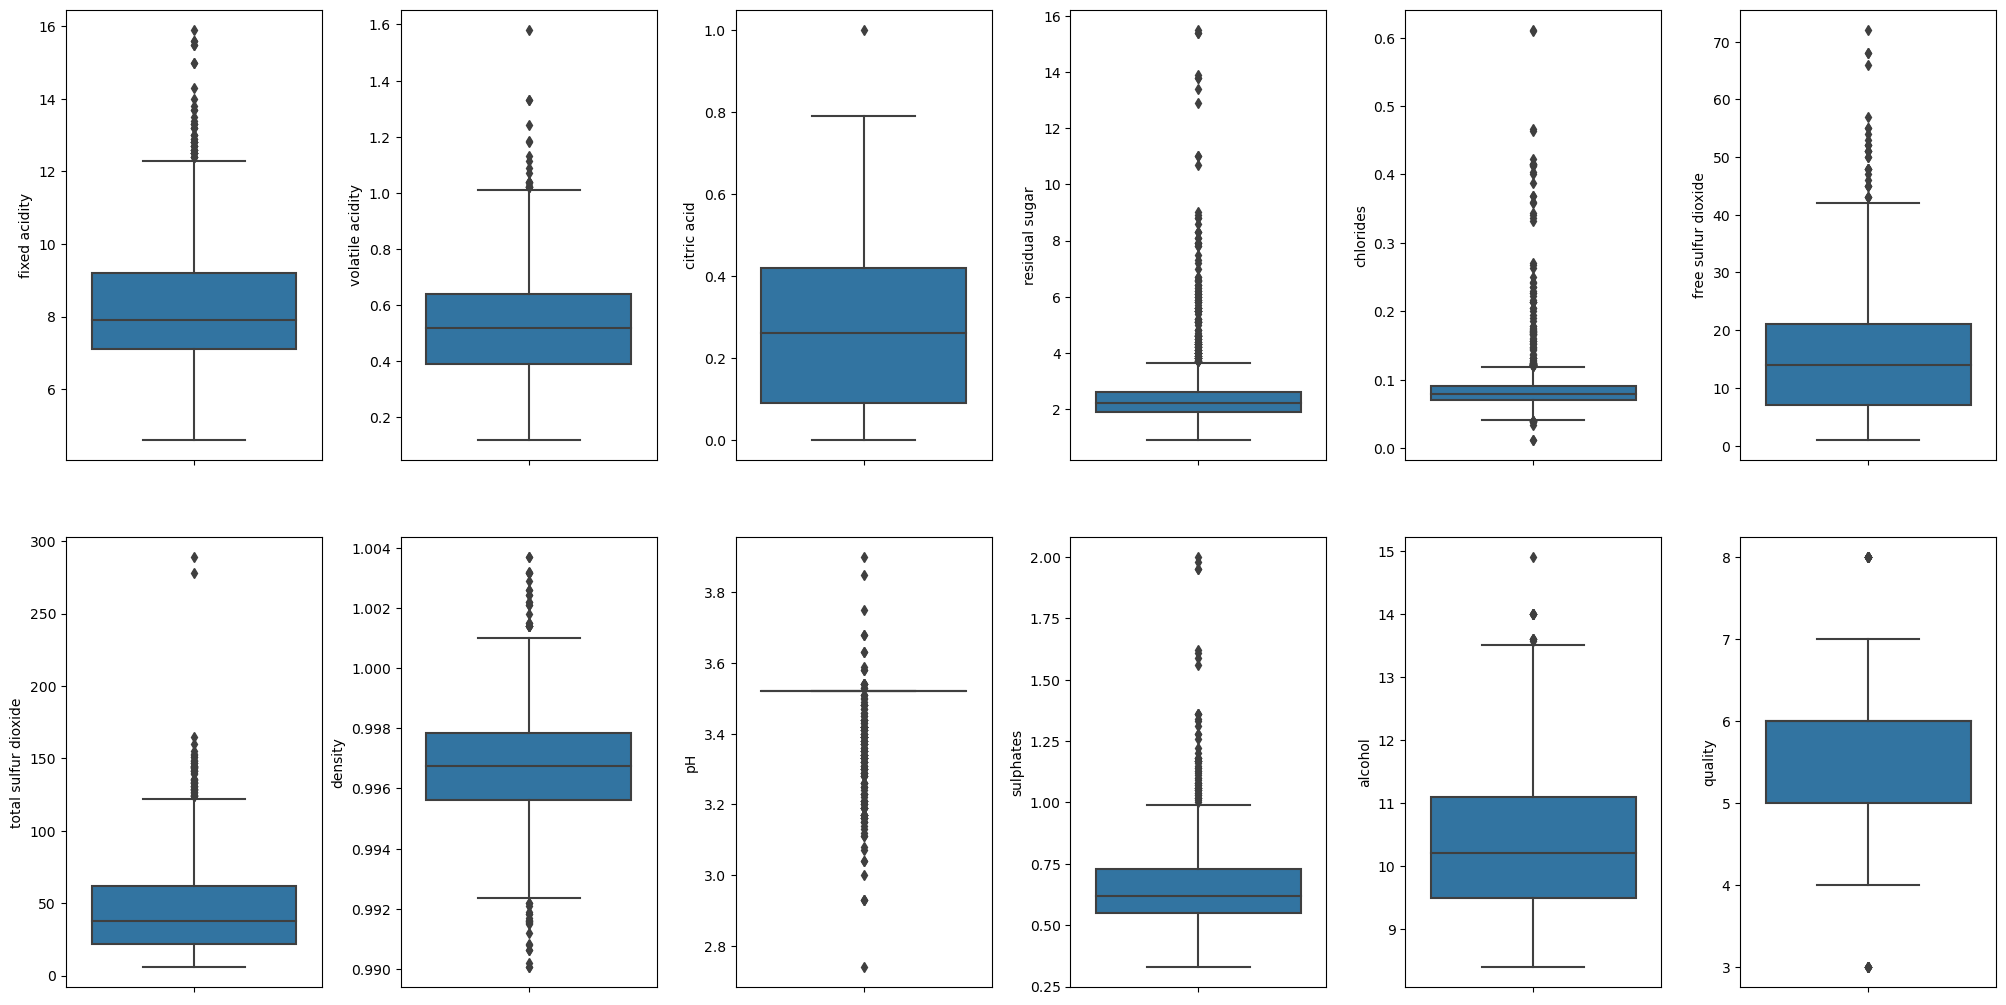

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))
idx = 0
ax = ax.flatten()

for c, val in data.items():
    if c != 'type':
        sns.boxplot(y=c, data=data, ax=ax[idx])
        idx += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

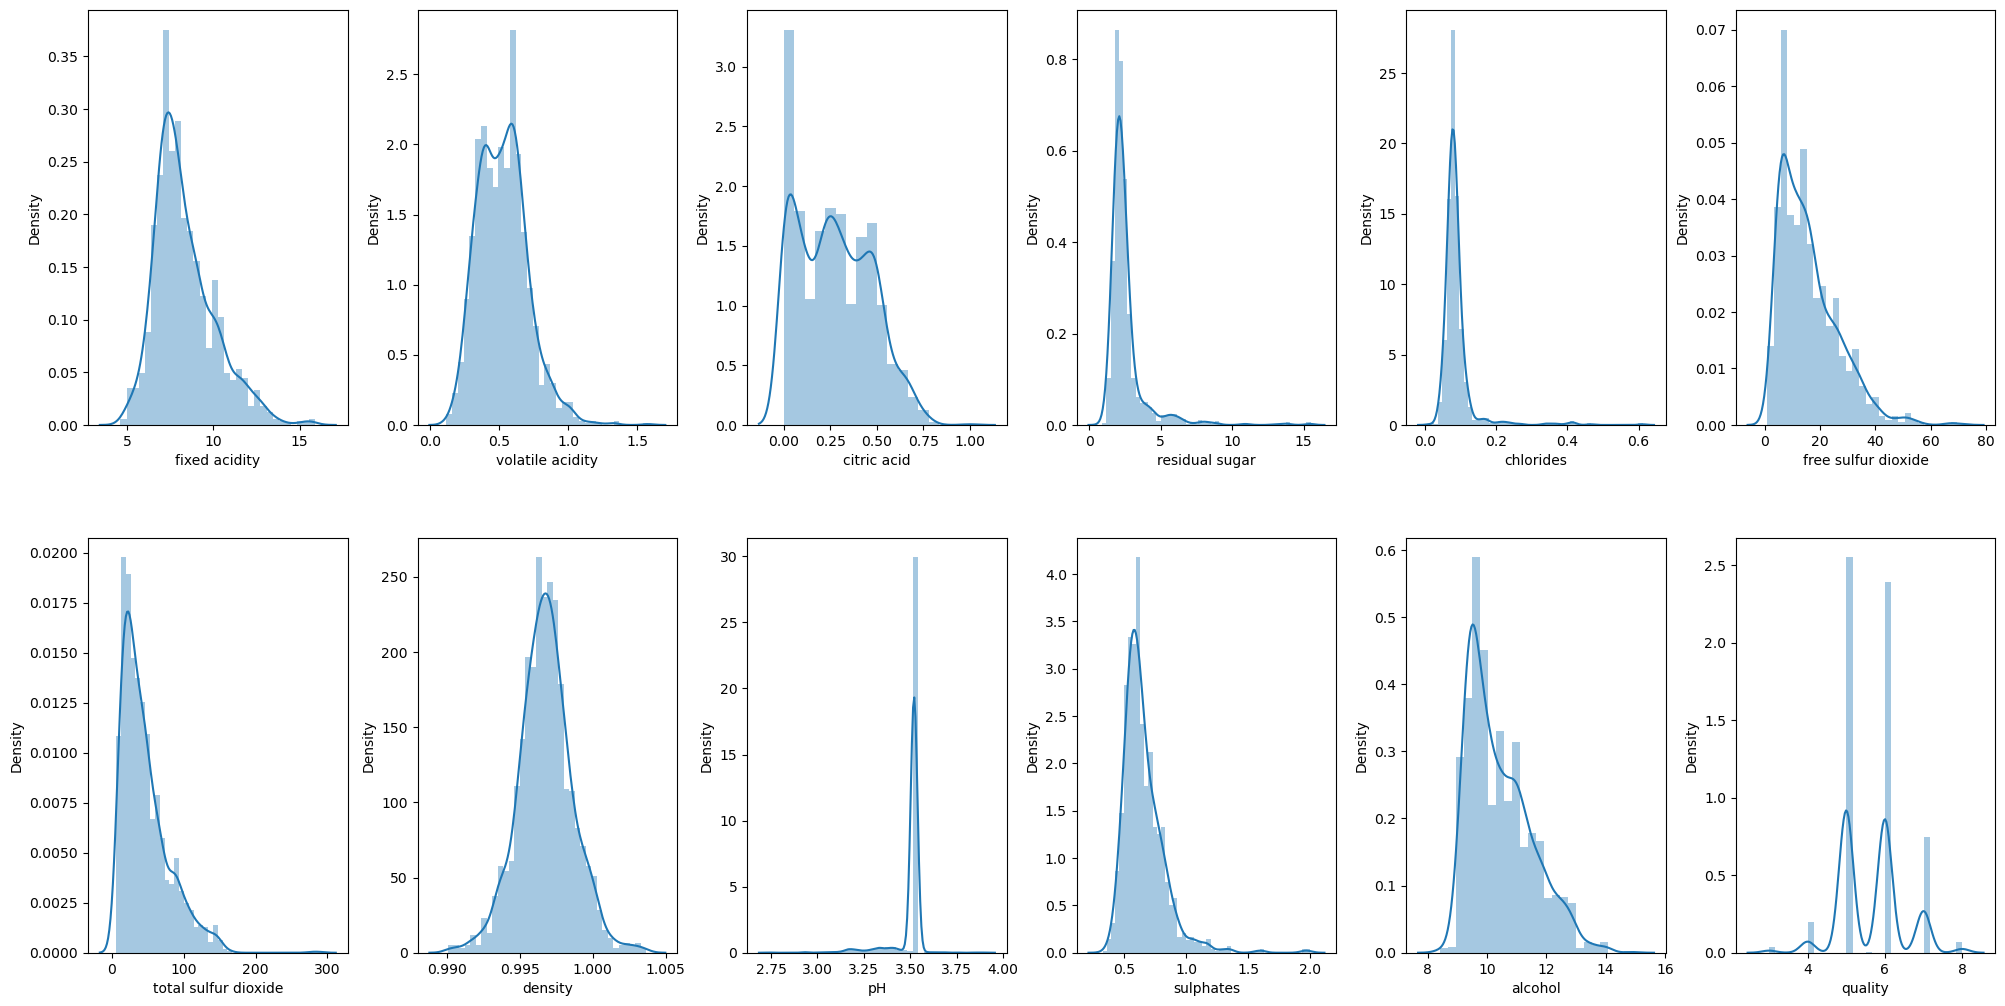

In [12]:
# create disctribution plot
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))
idx = 0
ax = ax.flatten()

for c, val in data.items():
    if c != 'type':
        sns.distplot(val, ax=ax[idx])
        idx += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

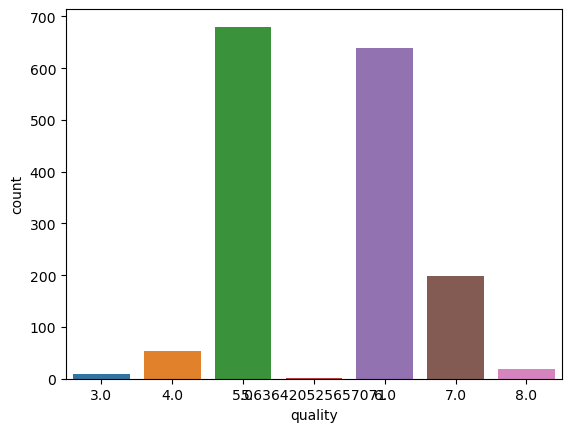

In [13]:
sns.countplot(data['quality'])

### correlation matrix

<AxesSubplot:>

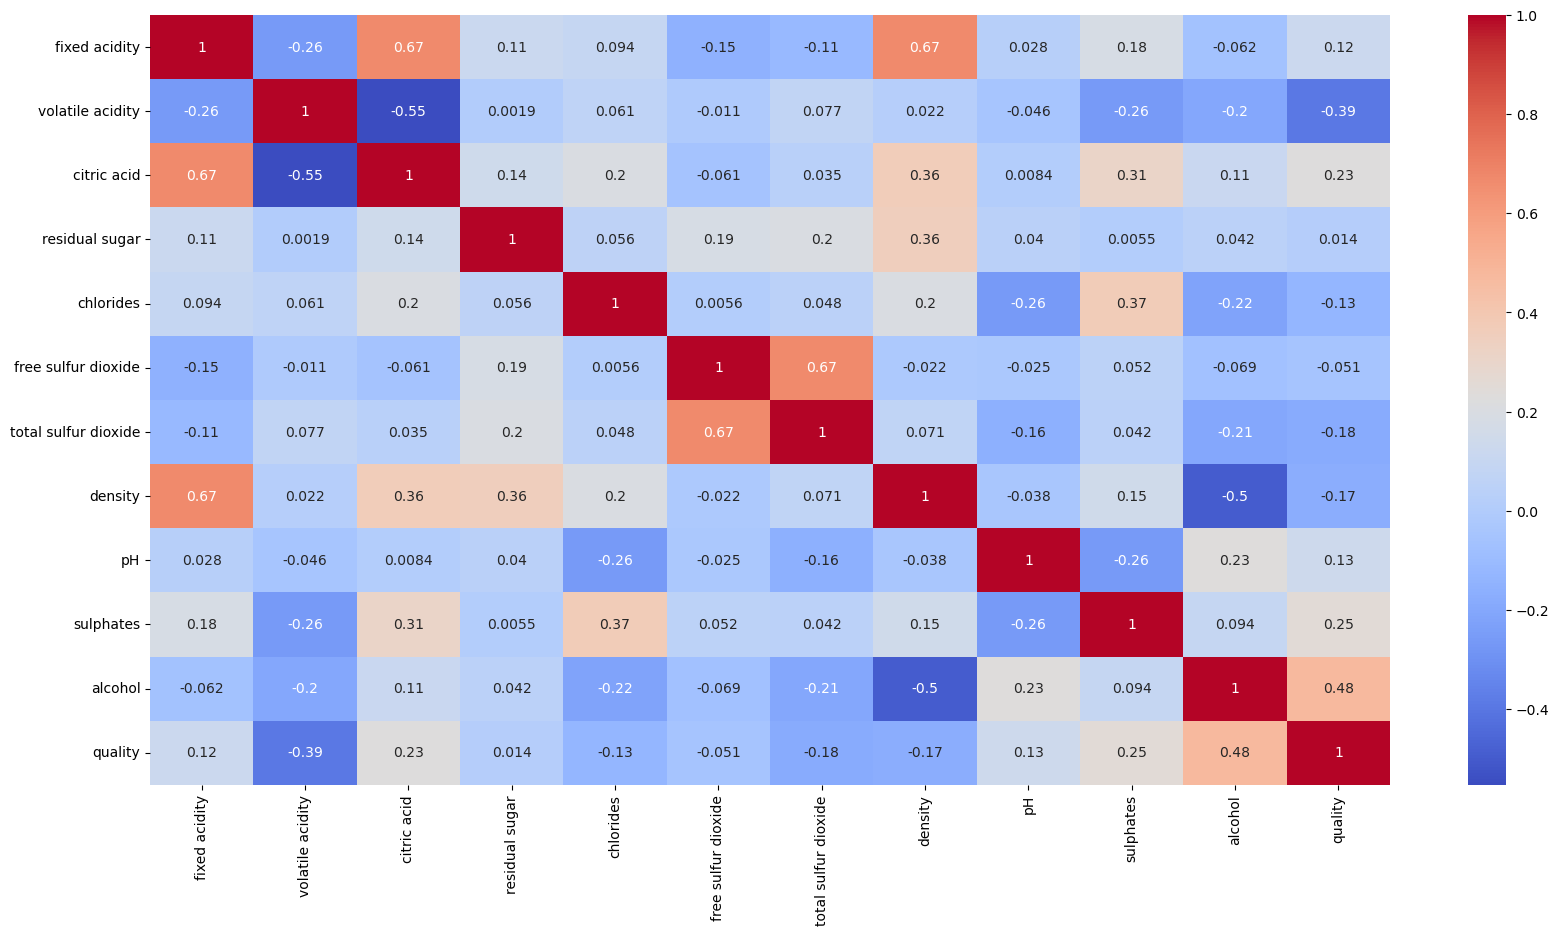

In [14]:
corr=data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Feature Selection

In [15]:
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,3.520000,0.63,11.8,8.0
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.99700,3.498586,0.58,9.3,6.0
344,11.9,0.57,0.50,2.6,0.082,6.0,32.0,1.00060,3.520000,0.78,10.7,6.0
191,6.4,0.37,0.25,1.9,0.074,21.0,49.0,0.99740,3.520000,0.62,9.8,6.0
340,12.2,0.34,0.50,2.4,0.066,10.0,21.0,1.00000,3.520000,1.18,9.2,6.0
938,7.2,0.38,0.38,2.8,0.068,23.0,42.0,0.99356,3.520000,0.72,12.9,7.0
604,8.3,0.58,0.13,2.9,0.096,14.0,63.0,0.99840,3.520000,0.62,9.1,6.0
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.520000,0.75,11.0,6.0
1577,6.2,0.70,0.15,5.1,0.076,13.0,27.0,0.99622,3.520000,0.60,11.9,6.0
1546,7.0,0.57,0.02,2.0,0.072,17.0,26.0,0.99575,3.520000,0.61,10.2,5.0


In [16]:
data['quality'].unique()

array([5.        , 6.        , 7.        , 4.        , 5.63642053,
       8.        , 3.        ])

In [17]:
# if wine quality is 7 or above then will consider as good quality wine
data['goodquality']=[1 if x>=7 else 0 for x in data['quality']]
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
559,13.0,0.47,0.49,4.3,0.085,6.0,47.0,1.00210,3.52,0.68,12.7,6.0,0
535,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.52,0.87,10.3,6.0,0
132,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5.0,0
1140,7.3,0.40,0.30,1.7,0.080,33.0,79.0,0.99690,3.52,0.65,9.5,6.0,0
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5.0,0
1467,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4.0,0
1495,7.0,0.43,0.02,1.9,0.080,15.0,28.0,0.99492,3.52,0.81,10.6,6.0,0
1406,8.2,0.24,0.34,5.1,0.062,8.0,22.0,0.99740,3.52,0.94,10.9,6.0,0
1070,9.3,0.33,0.45,1.5,0.057,19.0,37.0,0.99498,3.52,0.89,11.1,7.0,1
480,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.52,0.66,9.2,5.0,0


In [18]:
# seperate dependent and indepeendent variables
X=data.drop(['quality','goodquality'],axis=1)
Y=data['goodquality']

In [19]:
#see total number of good vs bad wines samples
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [20]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


In [21]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


## Feature importance


In [22]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score=classifiern.feature_importances_
print(score)

[0.08236802 0.10693649 0.09990292 0.0797824  0.07443243 0.07394983
 0.08954587 0.08899583 0.01195161 0.11747119 0.17466342]


## splitting dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

## Result

In [45]:
Result = pd.DataFrame(columns=['Model','Score'])

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
#accuracy(Y_test, Y_pred)
print("Accuracy Score:",accuracy_score(Y_test, y_pred))
Result.loc[len(Result)]=['LogisticRegression',accuracy_score(Y_test, y_pred)]
Result

Accuracy Score: 0.875


,Model,Score
0,LogisticRegression,0.875


## KNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test, y_pred))
Result.loc[len(Result)]=['KNeighborsClassifier',accuracy_score(Y_test, y_pred)]
Result

Accuracy Score: 0.8729166666666667


,Model,Score
0,LogisticRegression,0.875000
1,KNeighborsClassifier,0.872917


## using SVC 

In [48]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test, y_pred))
Result.loc[len(Result)]=['SVC',accuracy_score(Y_test, y_pred)]
Result


Accuracy Score: 0.86875


,Model,Score
0,LogisticRegression,0.875000
1,KNeighborsClassifier,0.872917
2,SVC,0.868750


## using Decision Tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test, y_pred))
Result.loc[len(Result)]=['using Decision Tree',accuracy_score(Y_test, y_pred)]
Result

Accuracy Score: 0.8604166666666667


,Model,Score
0,LogisticRegression,0.875000
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,using Decision Tree,0.860417


## using GaussianNB 

In [50]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test, y_pred))
Result.loc[len(Result)]=['GaussianNB',accuracy_score(Y_test, y_pred)]
Result

Accuracy Score: 0.7541666666666667


,Model,Score
0,LogisticRegression,0.875000
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,using Decision Tree,0.860417
4,GaussianNB,0.754167


## Using Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test, y_pred))
Result.loc[len(Result)]=['RandomForestClassifier',accuracy_score(Y_test, y_pred)]
Result

Accuracy Score: 0.9083333333333333


,Model,Score
0,LogisticRegression,0.875000
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,using Decision Tree,0.860417
4,GaussianNB,0.754167
5,RandomForestClassifier,0.908333


In [52]:
Result=Result.sort_values(by='Score',ascending=False)
Result

,Model,Score
5,RandomForestClassifier,0.908333
0,LogisticRegression,0.875000
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,using Decision Tree,0.860417
4,GaussianNB,0.754167
